#### 1. 划分数据集

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
import pandas as pd
#分块处理大文件
# chunk_iter = pd.read_csv("data/train_data.csv", chunksize=10000)
# chunks = [chunk for chunk in chunk_iter]
# train_data = pd.concat(chunks)
train_data = pd.read_csv("data/processed_train.csv")
test_data = pd.read_csv("data/processed_test.csv")
train_data = train_data.drop(columns='issueDate')
test_data = test_data.drop(columns='issueDate')
'''#截取前10000行数据
train_data=train_data.iloc[:10000,2:] '''
'''
# 划分特征变量与目标变量
X=train_data.drop(columns='isDefault')
Y=train_data['isDefault']
# 划分训练及测试集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
'''
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  int64  
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  int64  
 3   installment         800000 non-null  int64  
 4   grade               800000 non-null  int64  
 5   subGrade            800000 non-null  int64  
 6   employmentTitle     800000 non-null  float64
 7   homeOwnership       800000 non-null  int64  
 8   annualIncome        800000 non-null  int64  
 9   verificationStatus  800000 non-null  int64  
 10  isDefault           800000 non-null  int64  
 11  dti                 800000 non-null  int64  
 12  ficoRangeLow        800000 non-null  float64
 13  ficoRangeHigh       800000 non-null  float64
 14  revolUtil           800000 non-null  int64  
 15  earliesCreditLine   800000 non-nul

In [2]:
from sklearn.model_selection import train_test_split
 
feature_list = [col for col in train_data.columns if col != "isDefault"]
for fea in feature_list:
    train_data[fea] = train_data[fea].astype('int64')
    test_data[fea] = test_data[fea].astype('int64')
X_train, X_validation, y_train, y_validation = train_test_split(train_data.loc[:, feature_list], train_data.loc[:, 'isDefault'], test_size=0.2 , random_state=2000)

#### 2.权重统计

0:	learn: 0.6438165	total: 493ms	remaining: 48.8s
1:	learn: 0.6041469	total: 648ms	remaining: 31.7s
2:	learn: 0.5726872	total: 985ms	remaining: 31.8s
3:	learn: 0.5483656	total: 1.17s	remaining: 28s
4:	learn: 0.5308079	total: 1.37s	remaining: 26s
5:	learn: 0.5150613	total: 1.5s	remaining: 23.6s
6:	learn: 0.5034853	total: 1.68s	remaining: 22.4s
7:	learn: 0.4940764	total: 2.22s	remaining: 25.5s
8:	learn: 0.4863646	total: 2.53s	remaining: 25.6s
9:	learn: 0.4802039	total: 2.73s	remaining: 24.6s
10:	learn: 0.4752099	total: 2.87s	remaining: 23.3s
11:	learn: 0.4711910	total: 3.05s	remaining: 22.4s
12:	learn: 0.4678764	total: 3.25s	remaining: 21.7s
13:	learn: 0.4654842	total: 3.4s	remaining: 20.9s
14:	learn: 0.4631880	total: 3.62s	remaining: 20.5s
15:	learn: 0.4612211	total: 3.77s	remaining: 19.8s
16:	learn: 0.4594985	total: 4s	remaining: 19.5s
17:	learn: 0.4580763	total: 4.2s	remaining: 19.1s
18:	learn: 0.4568508	total: 4.35s	remaining: 18.6s
19:	learn: 0.4559494	total: 4.67s	remaining: 18.7s


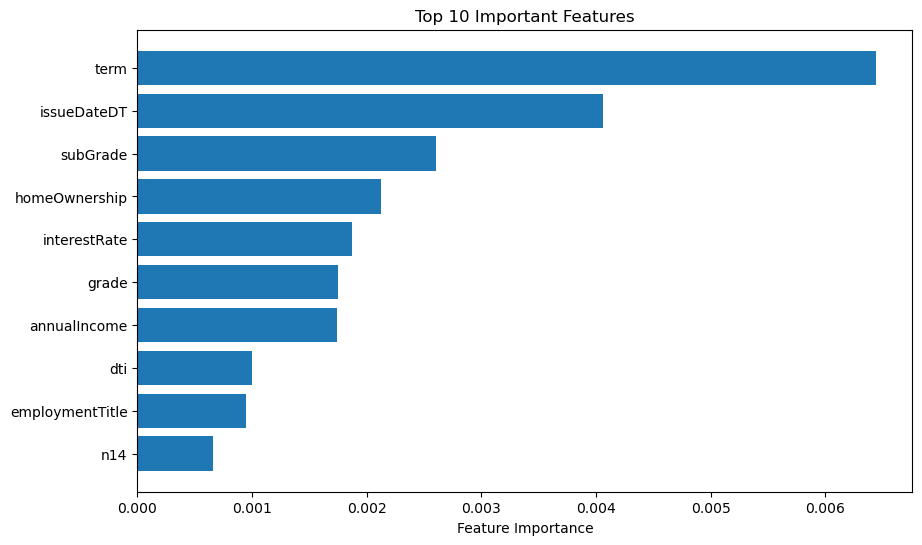

Feature 0: 0.00033857610638543534
Feature 1: 0.0064370539250703795
Feature 2: 0.001868769195722153
Feature 3: 0.0005097302265937298
Feature 4: 0.0017486418174765817
Feature 5: 0.0026040437722689713
Feature 6: 0.0009495719839696104
Feature 7: 0.002126193690687117
Feature 8: 0.0017362325070965356
Feature 9: 0.0001874328542775805
Feature 10: 0.0010001385292119358
Feature 11: 0.000369768600118503
Feature 12: 0.00033687103583390776
Feature 13: 0.00011207561883824768
Feature 14: 0.00027793423560135144
Feature 15: 5.719548413968267e-05
Feature 16: 0.0002320807518661483
Feature 17: 0.00017754674280723304
Feature 18: 6.694166410808888e-05
Feature 19: 0.0006571479716765971
Feature 20: 0.004060923768310076


In [4]:
import catboost
from catboost import CatBoostClassifier
from catboost.utils import get_roc_curve
# 获取类别特征索引（假设X_train是DataFrame）
cat_features_idx = [i for i, col in enumerate(X_train.columns) 
                    if X_train[col].dtype == 'object']  
# 创建并训练一个CatBoost分类器
model = CatBoostClassifier(iterations=100, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           cat_features=cat_features_idx)
model.fit(X_train, y_train)
# 假设 df 是你的 Pandas DataFrame
train_data = catboost.Pool(data=X_train, label=y_train)
# 获取特征重要性评估
feature_importance = model.get_feature_importance(data=train_data, type='LossFunctionChange')
# 获取特征名称
feature_names = train_data.get_feature_names()
# 将特征重要性和特征名称结合起来，创建一个字典
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 将特征重要性排序
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取排序后的特征名称和重要性
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:10], sorted_feature_importance[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # 反转y轴以显示重要性高的特征在顶部
plt.show()
# 打印特征重要性得分
for i, score in enumerate(feature_importance):
    print(f'Feature {i}: {score}')

In [3]:
# 3. 模型建立与训练
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, cat_features=feature_list, eval_metric='AUC', logging_level='Verbose', learning_rate=0.05, depth=6, l2_leaf_reg=5, loss_function='CrossEntropy')
model.fit(X_train.loc[:, feature_list], y_train, 
          eval_set=(X_validation.loc[:, feature_list], y_validation), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6942840	best: 0.6942840 (0)	total: 744ms	remaining: 1m 13s
1:	test: 0.6977473	best: 0.6977473 (1)	total: 1.54s	remaining: 1m 15s
2:	test: 0.7025593	best: 0.7025593 (2)	total: 2.11s	remaining: 1m 8s
3:	test: 0.7036131	best: 0.7036131 (3)	total: 2.93s	remaining: 1m 10s
4:	test: 0.7046930	best: 0.7046930 (4)	total: 3.45s	remaining: 1m 5s
5:	test: 0.7057725	best: 0.7057725 (5)	total: 4.12s	remaining: 1m 4s
6:	test: 0.7061735	best: 0.7061735 (6)	total: 4.67s	remaining: 1m 2s
7:	test: 0.7063476	best: 0.7063476 (7)	total: 5.16s	remaining: 59.4s
8:	test: 0.7069699	best: 0.7069699 (8)	total: 5.66s	remaining: 57.2s
9:	test: 0.7072312	best: 0.7072312 (9)	total: 6.18s	remaining: 55.6s
10:	test: 0.7068720	best: 0.7072312 (9)	total: 6.66s	remaining: 53.9s
11:	test: 0.7072285	best: 0.7072312 (9)	total: 7.11s	remaining: 52.1s
12:	test: 0.7076547	best: 0.7076547 (12)	total: 7.5s	remaining: 50.2s
13:	test: 0.7081026	best: 0.7081026 (13)	total: 7.87s	remaining: 48.3s
14:	test: 0.7080742	best: 

In [ ]:
# 4.测试集预测
preds = model.predict_proba(test_data[feature_list])
preds


array([[0.92087715, 0.07912285],
       [0.71542053, 0.28457947],
       [0.62919857, 0.37080143],
       ...,
       [0.74120586, 0.25879414],
       [0.68797578, 0.31202422],
       [0.9513777 , 0.0486223 ]])

In [ ]:
test_data['isDefault'] = preds[:, 1]  # 取正类的概率存储
test_data[['id', 'isDefault']].to_csv('submission.csv', index=False)